# PyDaddy with vector data

(This notebook assumes that you have gone through the [Getting Started](https://colab.research.google.com/github/tee-lab/PyDaddy/blob/colab/notebooks/1_getting_started.ipynb) notebook.)

`pydaddy` also works with (2-dimensional) vector data. For a 2-D timeseries $(x(t), y(t))$, `pydaddy` attempts to fit the following model:

$$
\frac{dx}{dt} = f_1(x, y) + g_{11}(x, y) \cdot \eta_1(t) + g_{12}(x, y) \cdot \eta_2(t) \\
\frac{dy}{dt} = f_2(x, y) + g_{21}(x, y) \cdot \eta_1(t) + g_{12}(x, y) \cdot \eta_2(t)
$$

Here, $f_1$ and $f_2$ are the drift functions, $g_{11}$ and $g_{22}$ are the diffusion terms, and $g_{12}$ and  $g_{21}$ are the cross-diffusion terms. This equation can also be written in the vector form as:

$$
\frac{d \mathbf{x}}{dt} = \mathbf{f}(\mathbf{x}) + \mathbf{g}(\mathbf{x}) \boldsymbol \eta
$$

where $\mathbf{x} = \begin{bmatrix} x \\ y \end{bmatrix}$,
$\mathbf{f} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}$,
$\mathbf{g} = \begin{bmatrix} g_{11} & g_{12} \\ g_{21} & g_{22} \end{bmatrix}$ and
$\boldsymbol \eta = \begin{bmatrix} \eta_1 \\ \eta_2 \end{bmatrix}$.

PyDaddy can estimate the drift function directly. For diffusion, PyDaddy estimates
$\mathbf G = \begin{bmatrix} G_{11} & G_{12} \\ G_{21} & G_{22} \end{bmatrix} = \mathbf g \mathbf g^T$.

In [30]:
# Execute this cell to set up PyDaddy in your Colab environment.
%pip install git+https://github.com/tee-lab/PyDaddy.git

  Cloning https://github.com/tee-lab/PyDaddy.git to /tmp/pip-req-build-638l9mv3
  Running command git clone --filter=blob:none --quiet https://github.com/tee-lab/PyDaddy.git /tmp/pip-req-build-638l9mv3
  Resolved https://github.com/tee-lab/PyDaddy.git to commit 450d4b8bcbac27850ceed140c844ffc446583f1a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [63]:
import pydaddy
import numpy as np
import sdeint
import matplotlib.pyplot as plt

## Initializing the `pydaddy` object

Similar to the scalar analysis, we need to initialize a `pydaddy` object. In this case, `data` will be a two element list, with elements corresponding to coordinates.

The example dataset used here the polarisation time series from a 2-dimensional agent-based simulation. For this model, the drift and diffusion functions are known -- the drift function is cubic while the diffusion is quadratic. In this notebook, we will examine if PyDaddy can estimate the drift and diffusion correctly from this dataset.

For more information about the model and the dataset, see [Jhawar et. al., 2020](https://doi.org/10.1038/s41567-020-0787-y).

| x range                           :   (-1.0, 1.0)  |
| x mean                            :      0.005     |
| y range                           :   (-1.0, 1.0)  |
| y mean                            :      0.02      |
| |(x, y)| range                    :  (0.002, 1.0)  |
| |(x, y)| mean                     :      0.778     |
| Autocorr time (x, y, |(x, y)|^2)  : (298, 264, 36) |



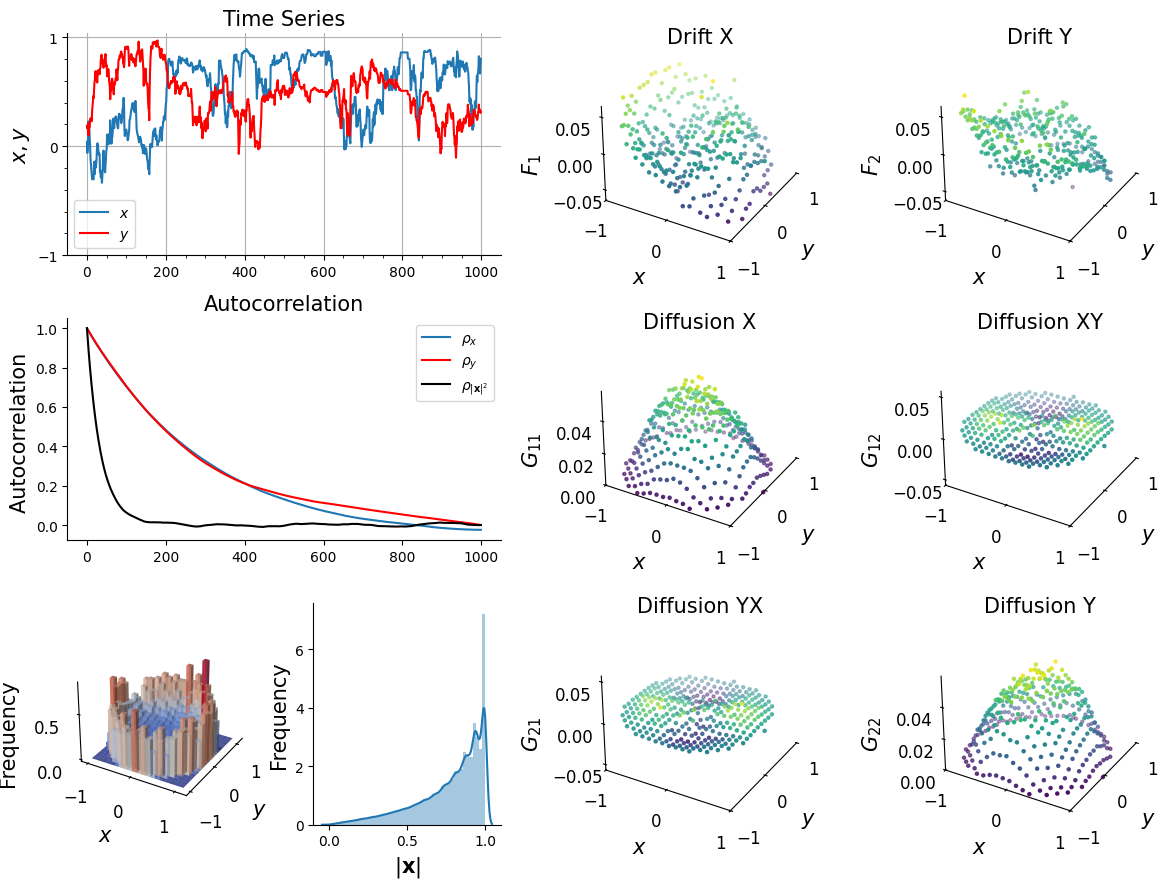

In [53]:
data, t = pydaddy.load_sample_dataset('model-data-vector-ternary')
ddsde = pydaddy.Characterize(data, t, bins=20)

In [172]:
def f(x):
    return np.array([
        0.67 * x[0] - 0.1 * x[0]*x[1],
        -1.33 * x[1] + 0.1 * x[0]*x[1]
    ])

def g(x):
  return (np.identity(x.shape[0]) * 0.0001)

dt = 0.001
timepoints = 1000000
t = np.arange(0, dt * timepoints, step=dt)
tspan = t
y0 = np.array([1.0, 1.0])
y0.shape[0]

2

In [134]:
t = np.ones(1)
x = np.zeros((len(t), 2))
x.shape[1]
# g(x)
np.identity(2).shape
x.shape
y0 = np.array([[1.0, 1.0]])
y0.shape

(1, 2)

In [150]:
G=lambda x, t: g(x)

print(G(x,t))

[[0.001]]


In [151]:
G(y0,tspan[0])

array([[0.001, 0.   ],
       [0.   , 0.001]])

In [138]:
if callable(G):
  Gtest = G(y0, tspan[0])
  print(Gtest)

[[0.001 0.   ]
 [0.    0.001]]


In [173]:
t = np.arange(0, dt * timepoints, step=dt)
x0 = [1.0, 1.0]            # Initial condition

# Simulate a time series with the given drift and diffusion functions, and given parameters.
x = sdeint.itoEuler(f=lambda x, t: f(x),
                    G=lambda x, t: g(x),
                    y0=x0, tspan=t)

In [174]:
x.T[0]

array([1.        , 1.00057083, 1.00114183, ..., 2.16453311, 2.16598493,
       2.16743948])

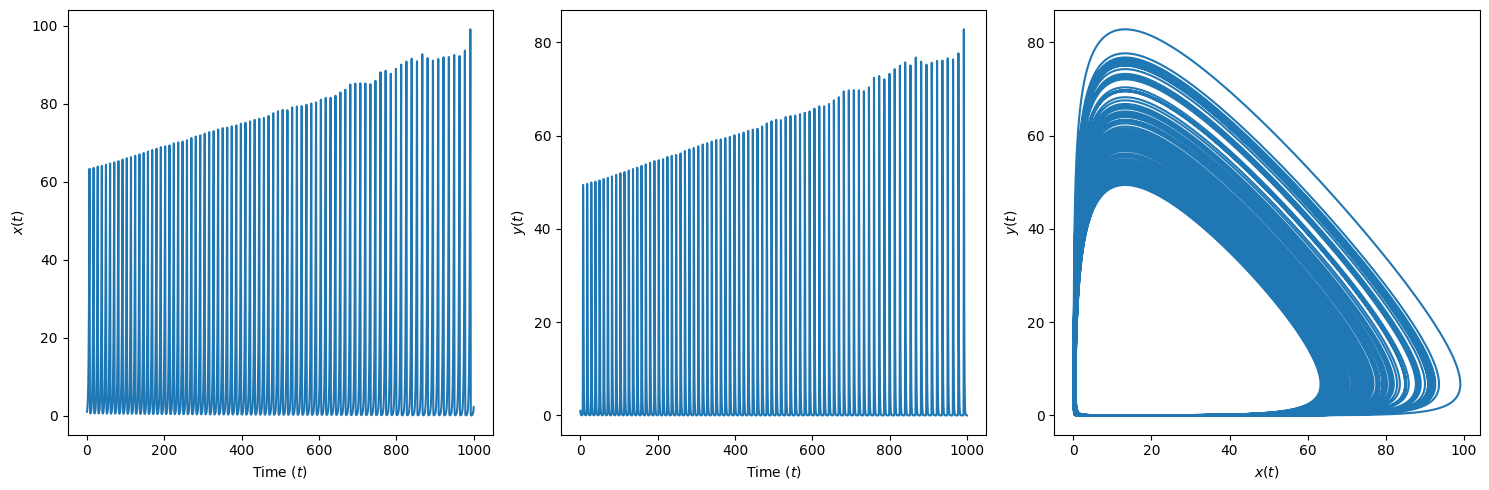

In [175]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(t[:-1], x.T[0][:-1])
ax[1].plot(t[:-1], x.T[1][:-1])
ax[2].plot(x.T[0][:-1], x.T[1][:-1])
ax[0].set(xlabel='Time ($t$)', ylabel='$x(t)$')
ax[1].set(xlabel='Time ($t$)', ylabel='$y(t)$')
ax[2].set(xlabel='$x(t)$', ylabel='$y(t)$')
plt.tight_layout()
plt.show()

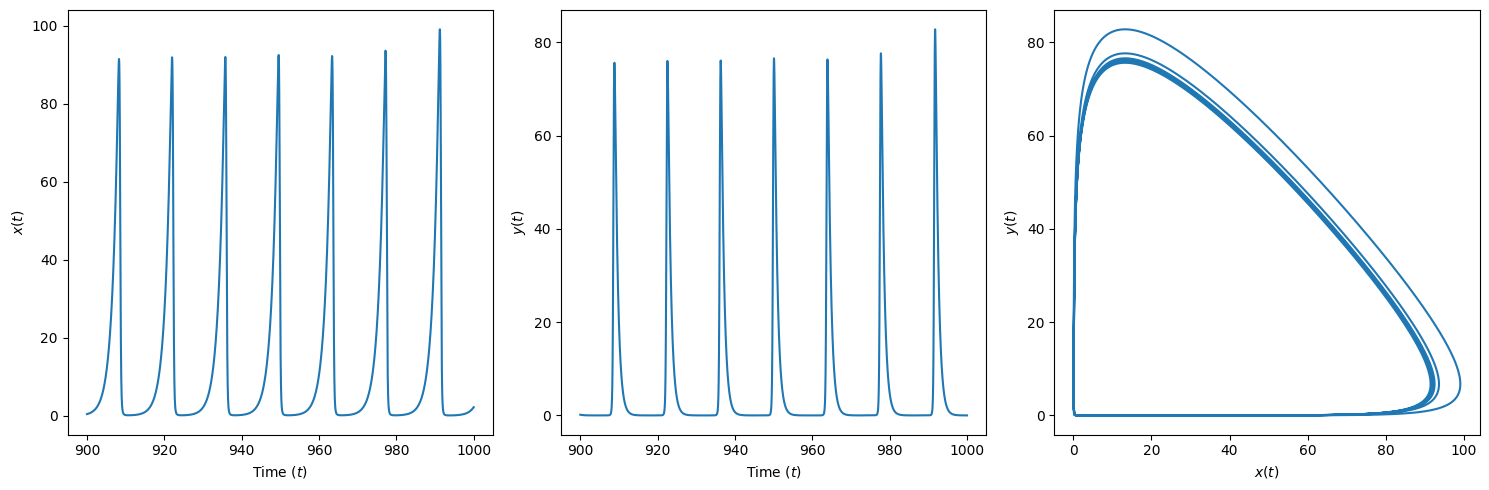

In [179]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(t[-100000:-1], x.T[0][-100000:-1])
ax[1].plot(t[-100000:-1], x.T[1][-100000:-1])
ax[2].plot(x.T[0][-100000:-1], x.T[1][-100000:-1])
ax[0].set(xlabel='Time ($t$)', ylabel='$x(t)$')
ax[1].set(xlabel='Time ($t$)', ylabel='$y(t)$')
ax[2].set(xlabel='$x(t)$', ylabel='$y(t)$')
plt.tight_layout()
plt.show()

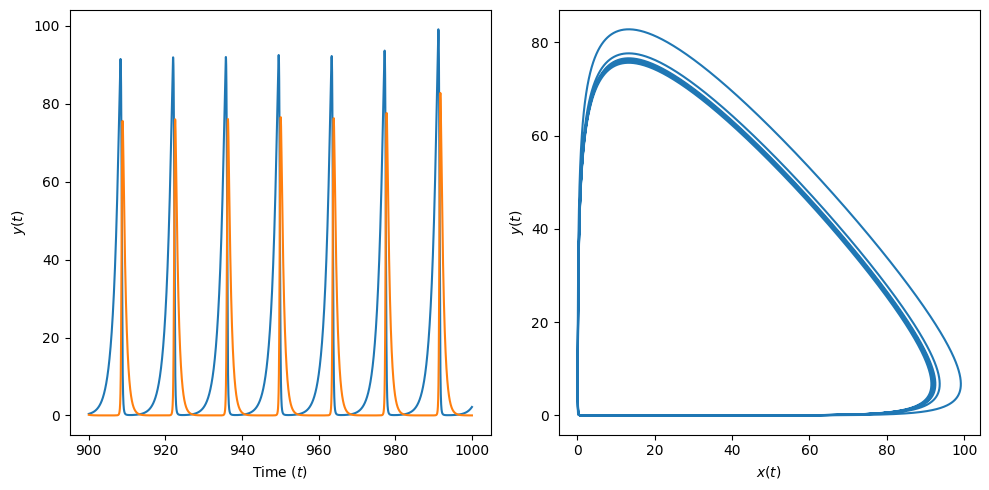

In [180]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(t[-100000:-1], x.T[0][-100000:-1])
ax[0].plot(t[-100000:-1], x.T[1][-100000:-1])
ax[1].plot(x.T[0][-100000:-1], x.T[1][-100000:-1])
ax[0].set(xlabel='Time ($t$)', ylabel='$x(t)$')
ax[0].set(xlabel='Time ($t$)', ylabel='$y(t)$')
ax[1].set(xlabel='$x(t)$', ylabel='$y(t)$')
plt.tight_layout()
plt.show()

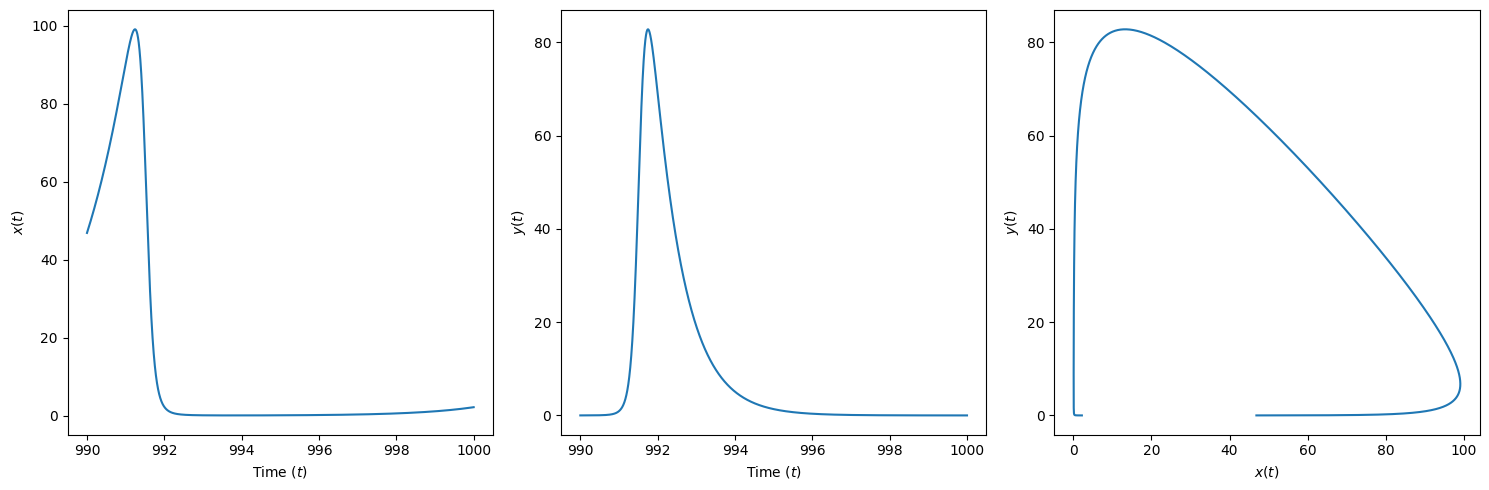

In [178]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(t[-10000:-1], x.T[0][-10000:-1])
ax[1].plot(t[-10000:-1], x.T[1][-10000:-1])
ax[2].plot(x.T[0][-10000:-1], x.T[1][-10000:-1])
ax[0].set(xlabel='Time ($t$)', ylabel='$x(t)$')
ax[1].set(xlabel='Time ($t$)', ylabel='$y(t)$')
ax[2].set(xlabel='$x(t)$', ylabel='$y(t)$')
plt.tight_layout()
plt.show()

| x range                           : (0.056, 99.142)|
| x mean                            :     13.263     |
| y range                           :  (0.0, 82.805) |
| y mean                            :      6.681     |
| |(x, y)| range                    : (0.279, 99.385)|
| |(x, y)| mean                     :     18.642     |
| Autocorr time (x, y, |(x, y)|^2)  : (8393652, 9510230, 24819205)|



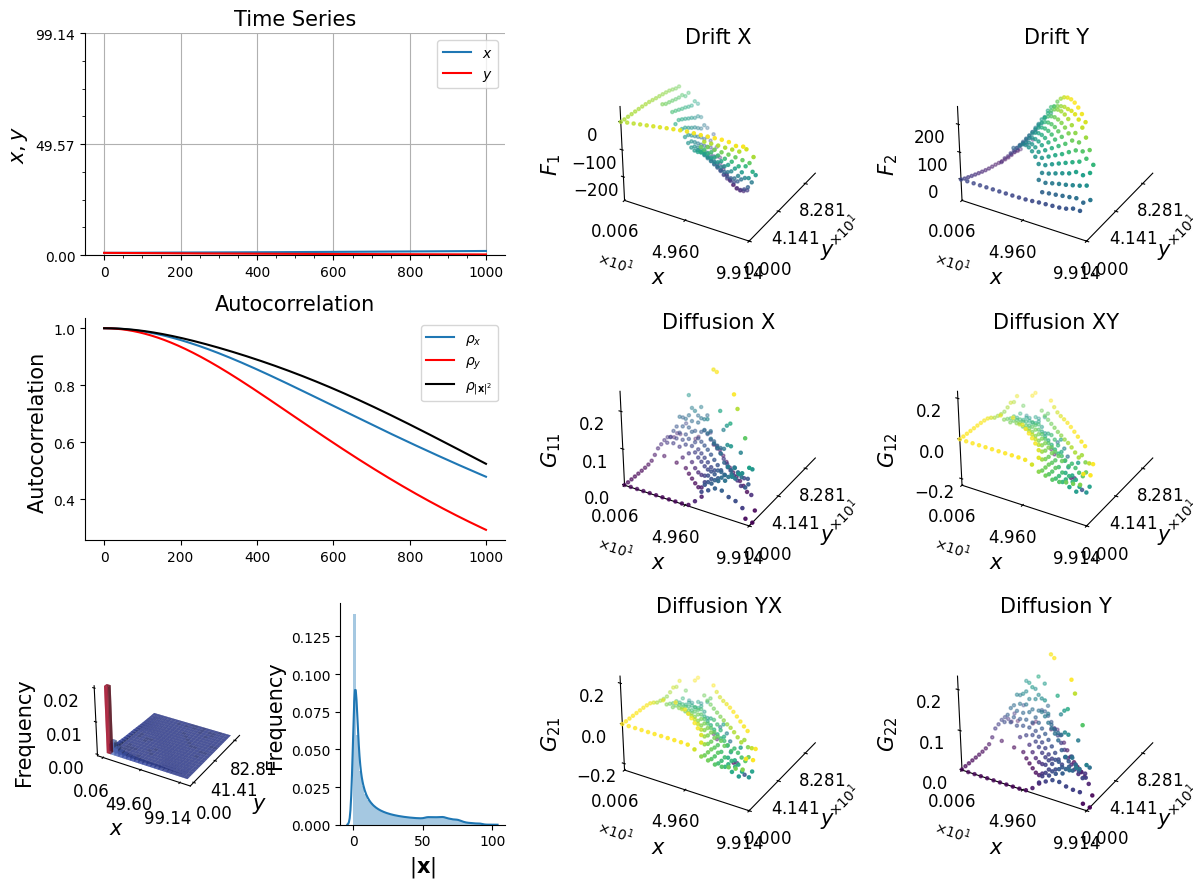

In [182]:
ddsde = pydaddy.Characterize(x.T, t, bins=20)

## Recovering functional forms for drift and diffusion

There are 5 different functions, each of two variables: two drift functions ($F_1$ and $F_2$), two diffusion functions ($G^2_{11}$ and $G^2_{22}$) and a cross diffusion term ($G^2_{12} = G^2_{21}$). As with the 1D example, these can be fit by calling the `ddsde.fit()` function.

In [183]:
F1 = ddsde.fit('F1', order=3, tune=True)
print(F1)

(0.670 ± 0.000)x + (-0.100 ± 0.000)xy


In [184]:
F2 = ddsde.fit('F2', order=3, tune=True)
print(F2)

(-1.330 ± 0.000)y + (0.100 ± 0.000)xy


In [185]:
G11 = ddsde.fit('G11', order=3, tune=True)
print(G11)

(-0.001 ± 0.000) + (0.001 ± 0.000)x


In [186]:
G22 = ddsde.fit('G22', order=3, tune=True)
print(G22)

(0.002 ± 0.000) + (-0.000 ± 0.000)x + (-0.000 ± 0.000)x^2 + (0.000 ± 0.000)x^3 + (0.000 ± 0.000)y + (0.000 ± 0.000)xy + (-0.000 ± 0.000)x^2y + (-0.000 ± 0.000)y^2 + (-0.000 ± 0.000)xy^2 + (0.000 ± 0.000)y^3


In this case, the automatic threshold tuning set the threshold to be too high for $G_{22}$, which ended up eliminating all terms. We can correct this by manually choosing a more appropriate threshold (see [Advanced Function Fitting](./3_advanced_function_fitting.ipynb) for more details.)

In [187]:
G22 = ddsde.fit('G22', order=3, threshold=0.01)
print(G22)

0


In [ ]:
G21 = ddsde.fit('G21', order=3, tune=True)
print(G21)

The coefficients in $G_{21}$ are negligible, i.e. $G_{21}$ is effectively 0.
We can force `pydaddy` to ignore small coefficients by setting an appropriate sparity threshold manually instead of letting it automatically choose a threshold (see [Advanced Function Fitting](https://colab.research.google.com/github/tee-lab/PyDaddy/blob/colab/notebooks/3_advanced_function_fitting.ipynb) for further details).

In [ ]:
G21 = ddsde.fit('G21', order=3, threshold=0.1)
print(G21)

**Note:** Since $G_{21}$ and $G_{12}$ are identical, fitting one will automatically assign the value for the other.

The discovered drift and diffusion functions are consistent with the theoretically expected SDE for the model. For more details, see [Jhawar et. al., 2020](https://doi.org/10.1038/s41567-020-0787-y).

## Interactive plots for drift and diffusion

As with the 1D example, we can get interactive plots of drift and diffusion functions using `ddsde.drift()` and `ddsde.diffusion()`. For 2D, there is also the `ddsde.cross_diffusion()` function to get the cross-diffusion plot.

In [ ]:
ddsde.drift()

In [ ]:
ddsde.diffusion()

In [ ]:
ddsde.cross_diffusion()

## Diagnostics

As mentioned in the [Getting Started](https://colab.research.google.com/github/tee-lab/PyDaddy/blob/colab/notebooks/1_getting_started.ipynb) notebook, `pydaddy` allows us to check if all underlying assumptions for fitting a drift-diffusion model are met. In case for 2D, the `noise_diagnostics()` functions creates the following plots:
- The distribution of the noise, along with the correlation matrix as an inset. The residual distribution should be an isotropic Gaussian distribution, and the correlation matrix should be identitity
- Autocorrelation of the components of residuals $\eta_x$, $\eta_y$. These should be uncorrelated, i.e. the autocorrelation times should be close to 0.
- QQ plots of the marginals $\eta_x$ and $\eta_y$ against theoretical Gaussian distributions of the same mean and variance. Ideally (i.e. if the residuals are Gaussian distributed), all points of these plots should fall on a straight line of slope 1.

In [ ]:
ddsde.noise_diagnostics()

The `model_diagnostics()` functions checks if the model is self-consistent.

To do this, a simulated time series, with the same length and sampling time as the original time series, is generated by integrating the discovered SDE. The drift and diffusion functions are now re-estimated from this simulated time series, with the same fitting parameters as the original fit. If the model is self-consistent, the re-estimated drift and diffusion functions should match the original drift and diffusion.

(Note: This might take a few minutes to complete)

In [ ]:
ddsde.model_diagnostics(oversample=5)

## Next steps

- To learn more about how to manually fit the drift and diffusion functions, see [Advanced Function Fitting](./3_advanced_function_fitting.ipynb).
- To see PyDaddy in action on real world datasets, see [Example analysis: mesoscopic SDEs for fish schools](./7_example_fish_school.ipynb) and [Example analysis: SDEs for cancer cell migration](./8_example_cell_migration.ipynb).